<a href="https://colab.research.google.com/github/ayyyaa/Project/blob/main/ProjetReseauSociaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Installer les bibliothèques
!pip install networkx

# Télécharger le fichier
!wget https://snap.stanford.edu/data/ca-GrQc.txt.gz

# Décompresser
!gunzip ca-GrQc.txt.gz

--2025-04-23 09:02:31--  https://snap.stanford.edu/data/ca-GrQc.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109261 (107K) [application/x-gzip]
Saving to: ‘ca-GrQc.txt.gz’

ca-GrQc.txt.gz      100%[===================>] 106.70K   284KB/s    in 0.4s    

2025-04-23 09:02:32 (284 KB/s) - ‘ca-GrQc.txt.gz’ saved [109261/109261]

gzip: ca-GrQc.txt already exists; do you wish to overwrite (y or n)? Y


Charger et construire le graphe

In [13]:
import networkx as nx

# Lire le graphe à partir du fichier texte
G = nx.read_edgelist("ca-GrQc.txt", comments='#', nodetype=int)

# Afficher quelques infos de base
print(f"Nombre de nœuds : {G.number_of_nodes()}")
print(f"Nombre de liens : {G.number_of_edges()}")

# Afficher un aperçu des premiers nœuds
print("Exemple de nœuds :", list(G.nodes())[:10])


Nombre de nœuds : 5242
Nombre de liens : 14496
Exemple de nœuds : [3466, 937, 5233, 8579, 10310, 15931, 17038, 18720, 19607, 1854]


Code pour la distribution des degrés

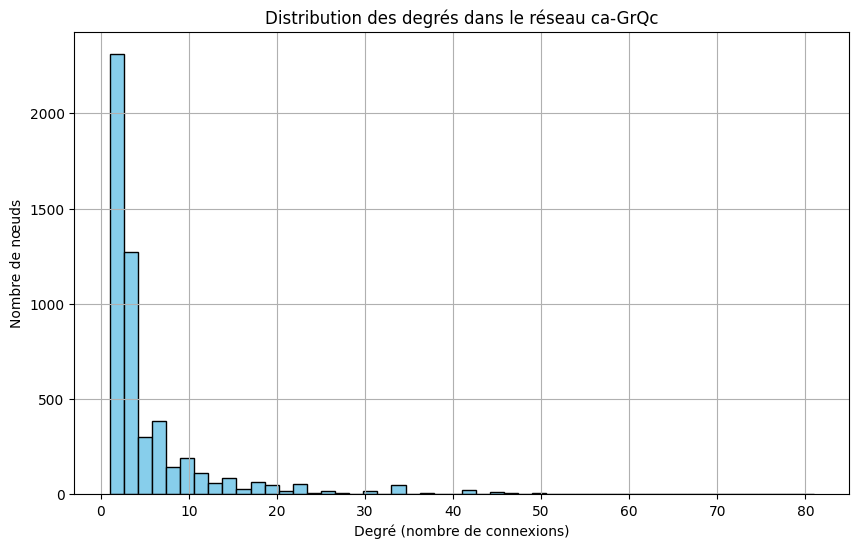

Degré minimum : 1
Degré maximum : 81
Degré moyen : 5.53


In [14]:
import matplotlib.pyplot as plt

# Calcul des degrés
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Affichage
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution des degrés dans le réseau ca-GrQc")
plt.xlabel("Degré (nombre de connexions)")
plt.ylabel("Nombre de nœuds")
plt.grid(True)
plt.show()

# Infos complémentaires
print(f"Degré minimum : {min(degree_sequence)}")
print(f"Degré maximum : {max(degree_sequence)}")
print(f"Degré moyen : {sum(degree_sequence)/len(degree_sequence):.2f}")


Installation des bibliothèques

In [15]:
!pip install cdlib
!pip install python-louvain
!pip install infomap


Préparer le graphe

In [16]:
from cdlib import algorithms
from cdlib import evaluation

# Ton graphe est déjà prêt : G


Tester 3 algorithmes

Propagation des labels

In [17]:
labels_comm = algorithms.label_propagation(G)
print("Label Propagation:", len(labels_comm.communities), "communautés trouvées")


Label Propagation: 1018 communautés trouvées


2. Louvain

In [18]:
louvain_comm = algorithms.louvain(G)
print("Louvain:", len(louvain_comm.communities), "communautés trouvées")


Louvain: 392 communautés trouvées


Infomap

In [19]:
infomap_comm = algorithms.infomap(G)
print("Infomap:", len(infomap_comm.communities), "communautés trouvées")


Infomap: 376 communautés trouvées


Comparaison des résultats

In [20]:
print("Modularité (Label Propagation) :", evaluation.newman_girvan_modularity(G, labels_comm).score)
print("Modularité (Louvain) :", evaluation.newman_girvan_modularity(G, louvain_comm).score)
print("Modularité (Infomap) :", evaluation.newman_girvan_modularity(G, infomap_comm).score)


Modularité (Label Propagation) : 0.7442160506750036
Modularité (Louvain) : 0.8618352727813376
Modularité (Infomap) : 0.8387372989625723


In [21]:
nx.number_connected_components(G)


355

Diamètre du graphe

In [23]:
if nx.is_connected(G):
    print("Diamètre du graphe :", nx.diameter(G))
else:
    print("Le graphe n'est pas connexe.")


Le graphe n'est pas connexe.


Mesure de centralité basée sur les chemins

In [24]:
centralite = nx.betweenness_centrality(G)
print("Centralité de quelques nœuds :", dict(list(centralite.items())[:5]))


Centralité de quelques nœuds : {3466: 0.001715248119663197, 937: 0.0003493412893676944, 5233: 0.0, 8579: 0.00035838805830684087, 10310: 0.00875853820067516}


In [29]:
# Choisir deux nœuds dans le graphe
noeuds = list(G.nodes())
source = noeuds[0]
target = noeuds[1]

# S'assurer que les deux nœuds existent et sont connectés
if source in G and target in G and nx.has_path(G, source, target):
    longueur = nx.shortest_path_length(G, source=source, target=target)
    print(f"Longueur du chemin entre {source} et {target} :", longueur)
else:
    print(f"Pas de chemin entre {source} et {target} ou nœuds inexistants.")



Longueur du chemin entre 3466 et 937 : 1


In [30]:
# Extraire la plus grande composante connexe
composantes_connexes = list(nx.connected_components(G))
plus_grande_composante = G.subgraph(max(composantes_connexes, key=len)).copy()

# Calcul de la longueur moyenne
moyenne = nx.average_shortest_path_length(plus_grande_composante)
print(f"Longueur moyenne des plus courts chemins (plus grande composante) : {moyenne:.2f}")


Longueur moyenne des plus courts chemins (plus grande composante) : 6.05


In [31]:
clustering_moyen = nx.average_clustering(G)
print(f"Coefficient de clustering moyen : {clustering_moyen:.4f}")


Coefficient de clustering moyen : 0.5296


 Centralité de degré (nombre de connexions directes)

In [32]:
centralite_deg = nx.degree_centrality(G)
print("Centralité de degré de quelques nœuds :", dict(list(centralite_deg.items())[:5]))


Centralité de degré de quelques nœuds : {3466: 0.0015264262545315779, 937: 0.0009540164090822362, 5233: 0.00038160656363289447, 8579: 0.0009540164090822362, 10310: 0.002480442663613814}


In [33]:
centralite_inter = nx.betweenness_centrality(G)
print("Centralité d’intermédiarité de quelques nœuds :", dict(list(centralite_inter.items())[:5]))


Centralité d’intermédiarité de quelques nœuds : {3466: 0.001715248119663197, 937: 0.0003493412893676944, 5233: 0.0, 8579: 0.00035838805830684087, 10310: 0.00875853820067516}


In [34]:
densite = nx.density(G)
print(f"Densité du graphe : {densite:.4f}")


Densité du graphe : 0.0011


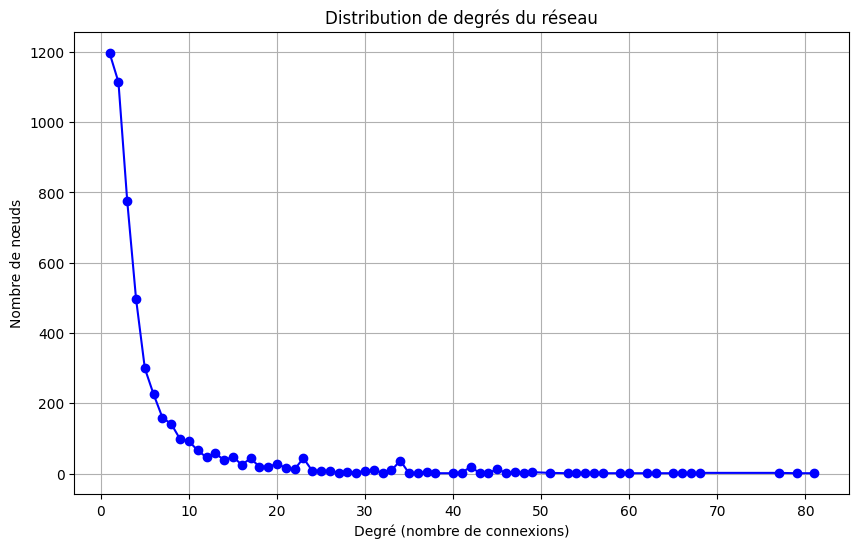

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Assure-toi que le graphe G est déjà chargé
# Exemple : G = nx.read_edgelist("ca-GrQc.txt", comments='#', nodetype=int)

# Récupérer les degrés de tous les nœuds
degree_sequence = [d for n, d in G.degree()]
degree_count = {}

# Compter combien de nœuds ont chaque degré
for deg in degree_sequence:
    degree_count[deg] = degree_count.get(deg, 0) + 1

# Trier les degrés
degrees = sorted(degree_count.keys())
counts = [degree_count[d] for d in degrees]

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.plot(degrees, counts, 'bo-')
plt.xlabel("Degré (nombre de connexions)")
plt.ylabel("Nombre de nœuds")
plt.title("Distribution de degrés du réseau")
plt.grid(True)
plt.show()
